In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import kagglehub
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import ast
import warnings
import ipywidgets as widgets

In [30]:
sns.set_palette("husl")
warnings.filterwarnings('ignore')

In [31]:
path = kagglehub.dataset_download("rounakbanik/pokemon")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\rounakbanik\pokemon\versions\1


In [32]:
df = pd.read_csv(path + "/pokemon.csv")

In [33]:
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [34]:
df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [35]:
df.columns


Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

# 2. Distribution of Pokemon Types (Primary)

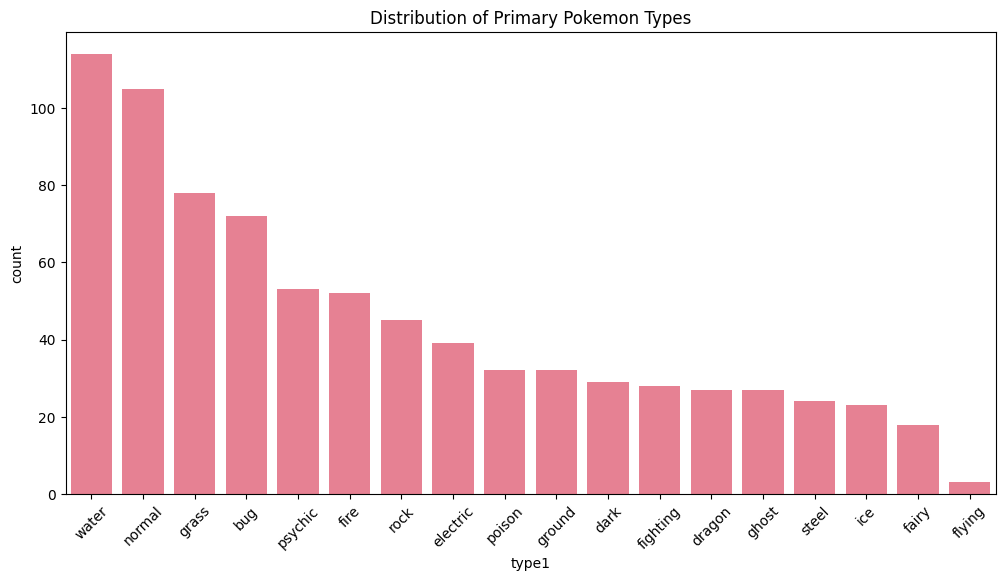

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='type1', order=df['type1'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Primary Pokemon Types')
plt.show()

# 3. Average Stats by Type

<Figure size 4000x3200 with 0 Axes>

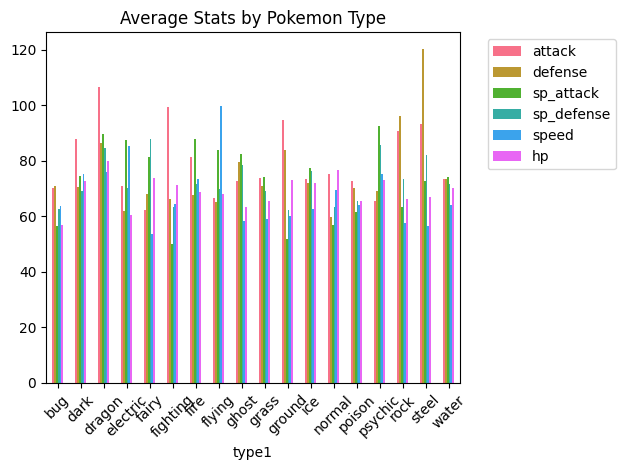

In [37]:
stats_cols = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'hp']
avg_stats = df.groupby('type1')[stats_cols].mean()

plt.figure(figsize=(40, 32))
avg_stats.plot(kind='bar')
plt.title('Average Stats by Pokemon Type')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 4. Correlation Matrix of Stats

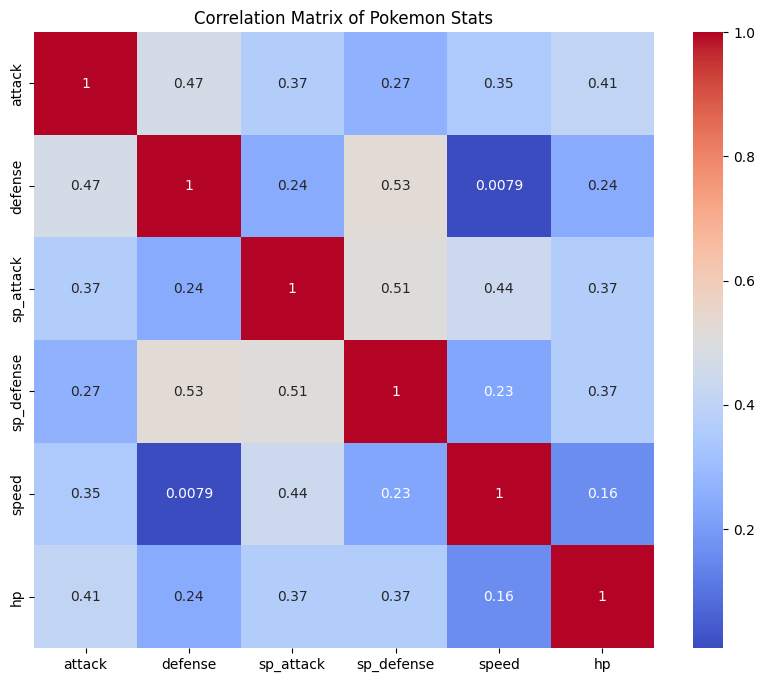

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[stats_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pokemon Stats')
plt.show()

# 5. Legendary vs Non-Legendary Pokemon Stats

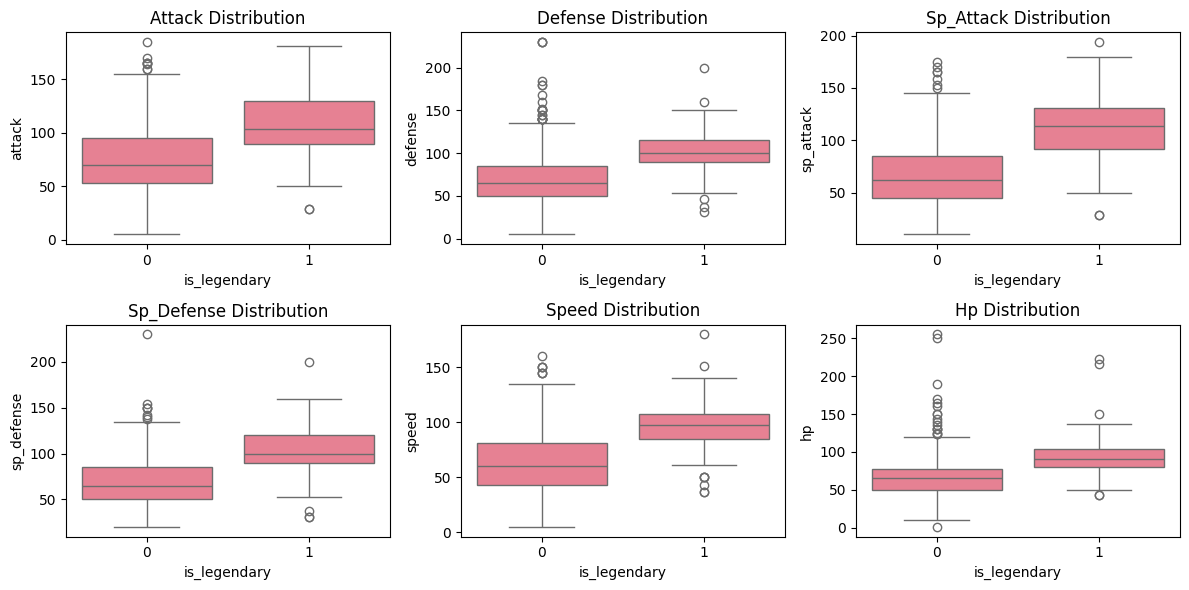

In [39]:
plt.figure(figsize=(12, 6))
for stat in stats_cols:
    plt.subplot(2, 3, stats_cols.index(stat) + 1)
    sns.boxplot(data=df, x='is_legendary', y=stat)
    plt.title(f'{stat.title()} Distribution')
plt.tight_layout()
plt.show()

# 6. Generation Analysis

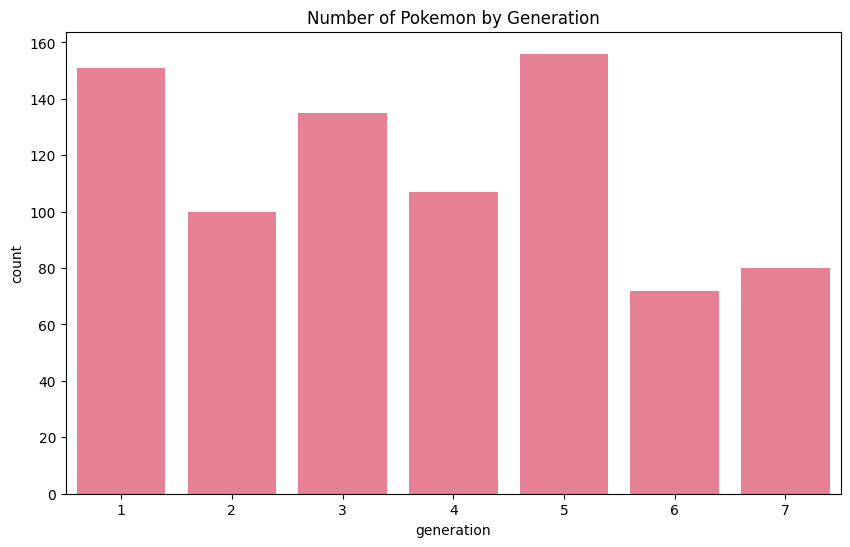

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='generation')
plt.title('Number of Pokemon by Generation')
plt.show()

# 7. Weight Distribution

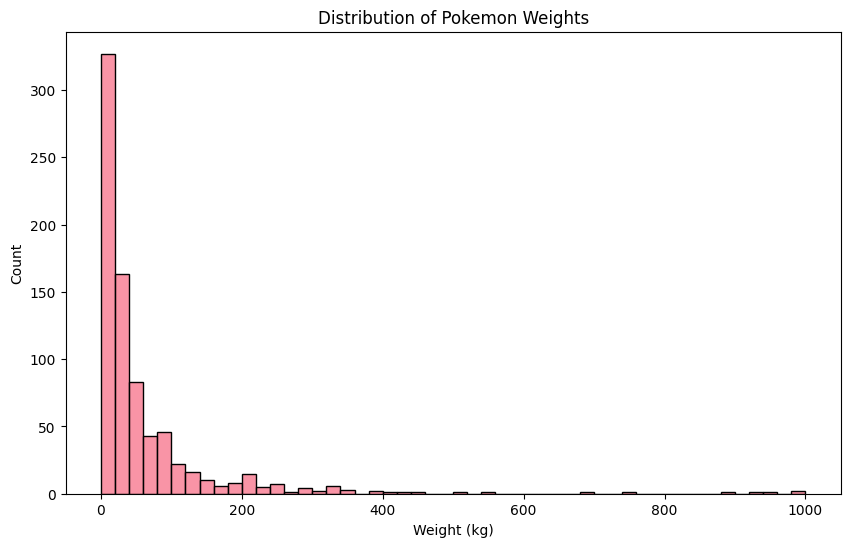

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='weight_kg', bins=50)
plt.title('Distribution of Pokemon Weights')
plt.xlabel('Weight (kg)')
plt.show()

# 9. Type Combinations (Top 15)

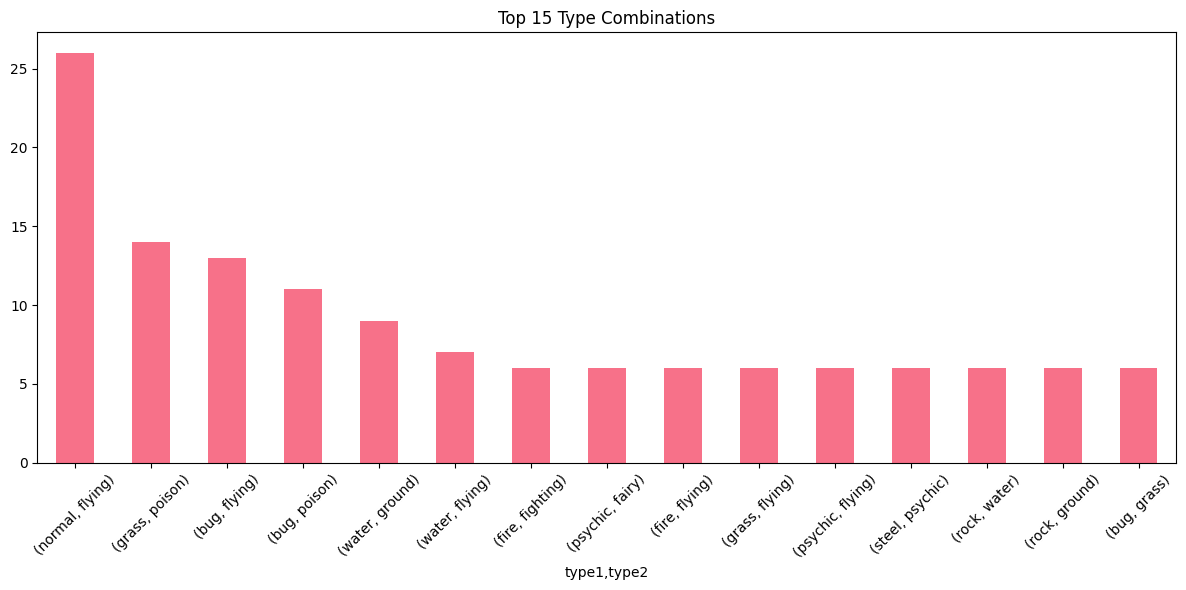

In [42]:
type_combinations = df.groupby(['type1', 'type2']).size().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
type_combinations.head(15).plot(kind='bar')
plt.title('Top 15 Type Combinations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10. Summary Statistics

In [43]:
print("\nInteresting Facts:")
print(f"Total number of Pokemon: {len(df)}")
print(f"Number of Legendary Pokemon: {df['is_legendary'].sum()}")
print(f"Number of Pokemon without secondary type: {df['type2'].isna().sum()}")
print(f"Most common primary type: {df['type1'].mode()[0]}")
print(f"Average HP: {df['hp'].mean():.2f}")
print(f"Highest Attack: {df.loc[df['attack'].idxmax(), 'name']} ({df['attack'].max()})")
print(f"Highest Defense: {df.loc[df['defense'].idxmax(), 'name']} ({df['defense'].max()})")
print(f"Fastest Pokemon: {df.loc[df['speed'].idxmax(), 'name']} ({df['speed'].max()})")


Interesting Facts:
Total number of Pokemon: 801
Number of Legendary Pokemon: 70
Number of Pokemon without secondary type: 384
Most common primary type: water
Average HP: 68.96
Highest Attack: Heracross (185)
Highest Defense: Steelix (230)
Fastest Pokemon: Deoxys (180)


# MODELLING

In [44]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [45]:
df.drop(columns=['japanese_name', 'capture_rate', 'generation', 'percentage_male', 'pokedex_number', 'base_egg_steps'], inplace=True)


In [46]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_happiness', 'base_total', 'classfication', 'defense',
       'experience_growth', 'height_m', 'hp', 'name', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'is_legendary'],
      dtype='object')

# 1. Data Preprocessing

In [47]:
df_processed = df.copy()
    
# Convert abilities from string representation of list to actual list
df_processed['abilities'] = df_processed['abilities'].apply(ast.literal_eval)

# Create separate rows for each ability
df_exploded = df_processed.explode('abilities')

# Handle missing values
df_exploded['type2'].fillna('none', inplace=True)
df_exploded['weight_kg'].fillna(df_exploded['weight_kg'].mean(), inplace=True)
df_exploded['height_m'].fillna(df_exploded['height_m'].mean(), inplace=True)

# Encode categorical variables
le_type1 = LabelEncoder()
le_type2 = LabelEncoder()
le_ability = LabelEncoder()
le_name = LabelEncoder()

df_exploded['type1_encoded'] = le_type1.fit_transform(df_exploded['type1'])
df_exploded['type2_encoded'] = le_type2.fit_transform(df_exploded['type2'])
df_exploded['ability_encoded'] = le_ability.fit_transform(df_exploded['abilities'])
df_exploded['name_encoded'] = le_name.fit_transform(df_exploded['name'])


# 2. Feature Engineering

In [48]:
def create_features(df):
    features = [
        'type1_encoded', 'type2_encoded', 'ability_encoded',
        'against_bug', 'against_dark', 'against_dragon',
        'against_electric', 'against_fairy', 'against_fight', 'against_fire',
        'against_flying', 'against_ghost', 'against_grass', 'against_ground',
        'against_ice', 'against_normal', 'against_poison', 'against_psychic',
        'against_rock', 'against_steel', 'against_water',
        'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'hp',
        'height_m', 'weight_kg', 'is_legendary'
    ]
    
    X = df[features]
    return X

# 3. Create Training Data

In [49]:
def calculate_effectiveness(attacker, defender):
    # Map type names to their corresponding column names
    type_map = {
        'fighting': 'fight'  # Add any other mappings if needed
    }
    
    # Calculate type effectiveness for type1
    type1_col = 'against_' + (type_map.get(attacker['type1'].lower(), attacker['type1'].lower()))
    type_effectiveness = defender[type1_col]
    
    # Calculate type effectiveness for type2 if it exists
    if attacker['type2'] != 'none':
        type2_col = 'against_' + (type_map.get(attacker['type2'].lower(), attacker['type2'].lower()))
        type_effectiveness *= defender[type2_col]
    
    # Calculate stat-based effectiveness
    stat_effectiveness = (
        attacker['attack'] + attacker['sp_attack'] + attacker['speed']
    ) / (
        defender['defense'] + defender['sp_defense'] + defender['hp']
    )
    
    return type_effectiveness * stat_effectiveness

In [50]:
n_samples = len(df_exploded)
pairs_indices = np.random.choice(n_samples, size=(n_samples * 5, 2))

X_train = []
y_train = []

for idx1, idx2 in pairs_indices:
    pokemon1 = df_exploded.iloc[idx1]
    pokemon2 = df_exploded.iloc[idx2]
    
    # Calculate effectiveness score
    effectiveness1 = calculate_effectiveness(pokemon1, pokemon2)
    effectiveness2 = calculate_effectiveness(pokemon2, pokemon1)
    
    # The better counter is the one with higher effectiveness
    winner = 1 if effectiveness1 > effectiveness2 else 0
    
    # Create feature vector
    features = np.concatenate([
        create_features(pd.DataFrame([pokemon1])).iloc[0],
        create_features(pd.DataFrame([pokemon2])).iloc[0]
    ])
    
    X_train.append(features)
    y_train.append(winner)

# 5. Train Model

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 6. Prediction Function

In [52]:
def predict_counter(model, pokemon_name, ability, df_processed, le_name, le_ability):
    # Get encoded values
    pokemon_encoded = le_name.transform([pokemon_name])[0]
    ability_encoded = le_ability.transform([ability])[0]
    
    # Get all possible counters
    all_counters = df_processed.copy()
    
    # Create feature pairs for prediction
    X_pred = []
    for _, counter in all_counters.iterrows():
        features = np.concatenate([
            create_features(pd.DataFrame([counter])).iloc[0],
            create_features(pd.DataFrame([df_processed[df_processed['name_encoded'] == pokemon_encoded].iloc[0]])).iloc[0]
        ])
        X_pred.append(features)
    
    # Make predictions
    predictions = model.predict_proba(np.array(X_pred))
    
    # Get top 5 counters
    top_indices = np.argsort(predictions[:, 1])[-5:][::-1]
    
    return all_counters.iloc[top_indices][['name', 'abilities', 'type1', 'type2', 'is_legendary']]

# VALIDATION

In [53]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train on the split training data
rf_model_val = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_val.fit(X_train_split, y_train_split)

# Get predictions on validation set
y_pred = rf_model_val.predict(X_val)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1017
           1       0.78      0.78      0.78       969

    accuracy                           0.79      1986
   macro avg       0.79      0.79      0.79      1986
weighted avg       0.79      0.79      0.79      1986



# PREDICTIONS

In [54]:
pokemon_name = "Rattata"
ability = "Gluttony"

print(f"\nTop 5 counters for {pokemon_name} with {ability}:")
counters = predict_counter(rf_model, pokemon_name, ability, df_exploded, le_name, le_ability)
print(counters)


Top 5 counters for Rattata with Gluttony:
           name    abilities     type1   type2  is_legendary
309   Manectric       Static  electric    none             0
114  Kangaskhan      Scrappy    normal    none             0
334    Zangoose  Toxic Boost    normal    none             0
772    Silvally   RKS System    normal    none             0
5     Charizard  Solar Power      fire  flying             0


In [55]:
pokemon_list = sorted(df['name'].unique())
pokemon_dropdown = widgets.Dropdown(
    options=pokemon_list,
    description='Pokemon:',
    style={'description_width': 'initial'}
)

# Create output widget to display abilities
output = widgets.Output()

def on_pokemon_select(change):
    with output:
        clear_output()
        selected_pokemon = change.new
        abilities = df[df['name'] == selected_pokemon]['abilities'].iloc[0]
        # Convert string representation of list to actual list if needed
        if isinstance(abilities, str):
            abilities = ast.literal_eval(abilities)
        print(f"\nAbilities for {selected_pokemon}:")
        for ability in abilities:
            print(f"- {ability}")

# Register the callback
pokemon_dropdown.observe(on_pokemon_select, names='value')

# Create the layout
form = widgets.VBox([
    pokemon_dropdown,
    output
])

# Display the form
display(form)

In [56]:
from IPython.display import clear_output

pokemon_name = widgets.Textarea(
    value='Enter your pokemon name here',
    description='Text Input:',
    disabled=False
)

ability = widgets.Textarea(
    value='Enter your ability here',
    description='Text Input:',
    disabled=False
)

pb = widgets.Button(
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
)

def on_button_clicked(b):
    clear_output(wait=True)
    print(f"\nTop 5 counters for {pokemon_name.value} with {ability.value}:")
    counters = predict_counter(rf_model, pokemon_name.value, ability.value, df_exploded, le_name, le_ability)
    print(counters)
    display(ui)

pb.on_click(on_button_clicked)

ui = widgets.VBox([widgets.HBox([pokemon_name, ability]),pb])

display(ui)


Top 5 counters for Mewtwo with Pressure:
          name    abilities type1  type2  is_legendary
211     Scizor        Swarm   bug  steel             0
211     Scizor   Technician   bug  steel             0
247  Tyranitar  Sand Stream  rock   dark             0
211     Scizor  Light Metal   bug  steel             0
247  Tyranitar      Unnerve  rock   dark             0
